In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(11,8)})
pd.pandas.set_option("display.max_columns",None)

In [4]:
df = pd.read_csv("AgentPerformance.csv")

In [8]:
data = df.copy()

## clean data

In [11]:
data.head()

,SL No,Date,Agent Name,Total Chats,Average Response Time,Average Resolution Time,Average Rating,Total Feedback
0,1,7/30/2022,Prerna Singh,11,0:00:38,0:04:20,4.11,9
1,2,7/30/2022,Nandani Gupta,11,0:01:15,0:28:25,3.14,7
2,3,7/30/2022,Ameya Jain,14,0:00:30,0:11:36,4.55,11
3,4,7/30/2022,Mahesh Sarade,14,0:01:04,0:15:46,4.71,7
4,5,7/30/2022,Swati,14,0:01:11,0:16:33,3.67,6


In [12]:
data.shape

(2160, 8)

In [13]:
# drop unwanted colums
data.drop("SL No",axis=1,inplace=True)

In [14]:
data.head()

,Date,Agent Name,Total Chats,Average Response Time,Average Resolution Time,Average Rating,Total Feedback
0,7/30/2022,Prerna Singh,11,0:00:38,0:04:20,4.11,9
1,7/30/2022,Nandani Gupta,11,0:01:15,0:28:25,3.14,7
2,7/30/2022,Ameya Jain,14,0:00:30,0:11:36,4.55,11
3,7/30/2022,Mahesh Sarade,14,0:01:04,0:15:46,4.71,7
4,7/30/2022,Swati,14,0:01:11,0:16:33,3.67,6


In [17]:
# change data type in to date time
data["Date"] = pd.to_datetime(data["Date"])

In [25]:
# fatch day from date
data["Day"] = data["Date"].dt.day

In [38]:
data.drop("Date",axis=1,inplace=True)

In [43]:
data["Average Response min"] = data["Average Response Time"].apply(lambda x:x.split(":")).str[1].astype(int)
data["Average Response seconds"] = data["Average Response Time"].apply(lambda x:x.split(":")).str[2].astype(int)

In [50]:
data.drop("Average Response Time",axis=1,inplace=True)

In [56]:
data["Average Resolution min"] = data["Average Resolution Time"].apply(lambda x:x.split(":")).str[1].astype(int)
data["Average Resolution second"] = data["Average Resolution Time"].apply(lambda x:x.split(":")).str[2].astype(int)

In [58]:
data.drop("Average Resolution Time",axis=1,inplace=True)

## EDA

In [62]:
data.head()# clean data

,Agent Name,Total Chats,Average Rating,Total Feedback,Day,Average Response min,Average Response seconds,Average Resolution min,Average Resolution second
0,Prerna Singh,11,4.11,9,30,0,38,4,20
1,Nandani Gupta,11,3.14,7,30,1,15,28,25
2,Ameya Jain,14,4.55,11,30,0,30,11,36
3,Mahesh Sarade,14,4.71,7,30,1,4,15,46
4,Swati,14,3.67,6,30,1,11,16,33


In [64]:
data.shape

(2160, 9)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Agent Name                 2160 non-null   object 
 1   Total Chats                2160 non-null   int64  
 2   Average Rating             2160 non-null   float64
 3   Total Feedback             2160 non-null   int64  
 4   Day                        2160 non-null   int64  
 5   Average Response min       2160 non-null   int32  
 6   Average Response seconds   2160 non-null   int32  
 7   Average Resolution min     2160 non-null   int32  
 8   Average Resolution second  2160 non-null   int32  
dtypes: float64(1), int32(4), int64(3), object(1)
memory usage: 118.2+ KB


In [74]:
# drop duplectes values
data.drop_duplicates(keep="first",inplace=True)

In [75]:
data.shape

(2121, 9)

In [76]:
# vo null value i this dataset
data.isnull().sum()

Agent Name                   0
Total Chats                  0
Average Rating               0
Total Feedback               0
Day                          0
Average Response min         0
Average Response seconds     0
Average Resolution min       0
Average Resolution second    0
dtype: int64

In [77]:
data.describe()

,Total Chats,Average Rating,Total Feedback,Day,Average Response min,Average Response seconds,Average Resolution min,Average Resolution second
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.00000
mean,6.940123,1.487826,4.365394,15.498821,0.241867,10.423857,6.390853,10.63272
std,11.775522,2.084189,7.457421,8.654158,0.690543,17.696977,10.141801,17.70866
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.00000
75%,13.000000,4.140000,8.000000,23.000000,0.000000,16.000000,13.000000,17.00000
max,97.000000,5.000000,56.000000,30.000000,17.000000,59.000000,53.000000,59.00000


In [80]:
numeric_features = data.dtypes[data.dtypes != "object"].index

In [81]:
numeric_features

Index(['Total Chats', 'Average Rating', 'Total Feedback', 'Day',
       'Average Response min', 'Average Response seconds',
       'Average Resolution min', 'Average Resolution second'],
      dtype='object')

In [90]:
data["Agent Name"].value_counts(normalize=True)*100

Rishav Dash               2.404526
Amersh                    1.414427
Anurag Tiwari             1.414427
Zeeshan                   1.414427
Mukesh Rao                1.414427
                            ...   
Prabir Kumar Satapathy    1.414427
Saurabh Shukla            1.414427
Wasim                     1.414427
Samprit                   1.414427
Jawala Prakash            1.414427
Name: Agent Name, Length: 70, dtype: float64

Index(['Total Chats', 'Average Rating', 'Total Feedback', 'Day',
       'Average Response min', 'Average Response seconds',
       'Average Resolution min', 'Average Resolution second'],
      dtype='object')


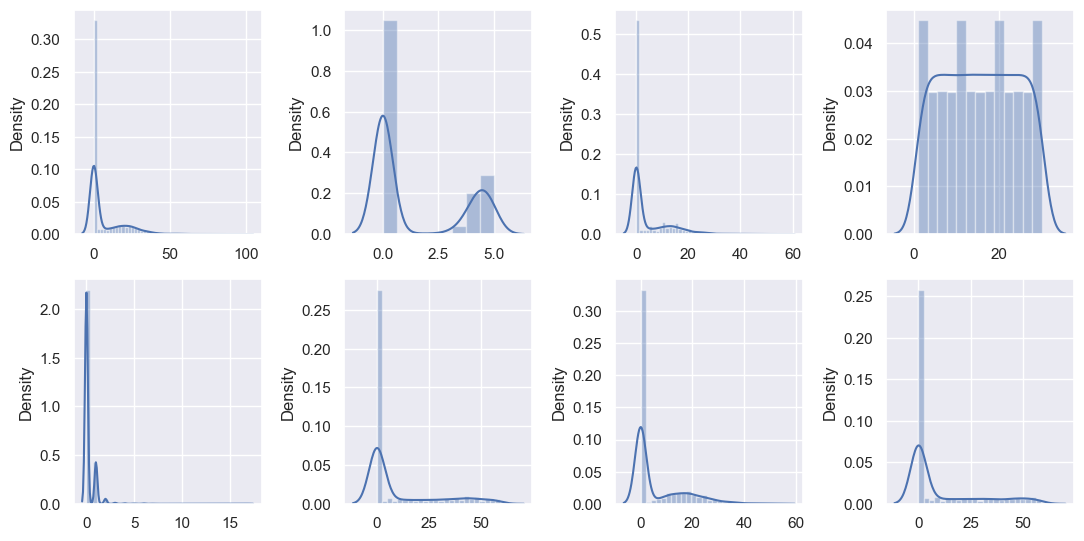

In [96]:
print(numeric_features)
try:
    for i in range(0,len(numeric_features)):
        plt.subplot(3,4,i+1)
        sns.distplot(x=data[numeric_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

Index(['Total Chats', 'Average Rating', 'Total Feedback', 'Day',
       'Average Response min', 'Average Response seconds',
       'Average Resolution min', 'Average Resolution second'],
      dtype='object')


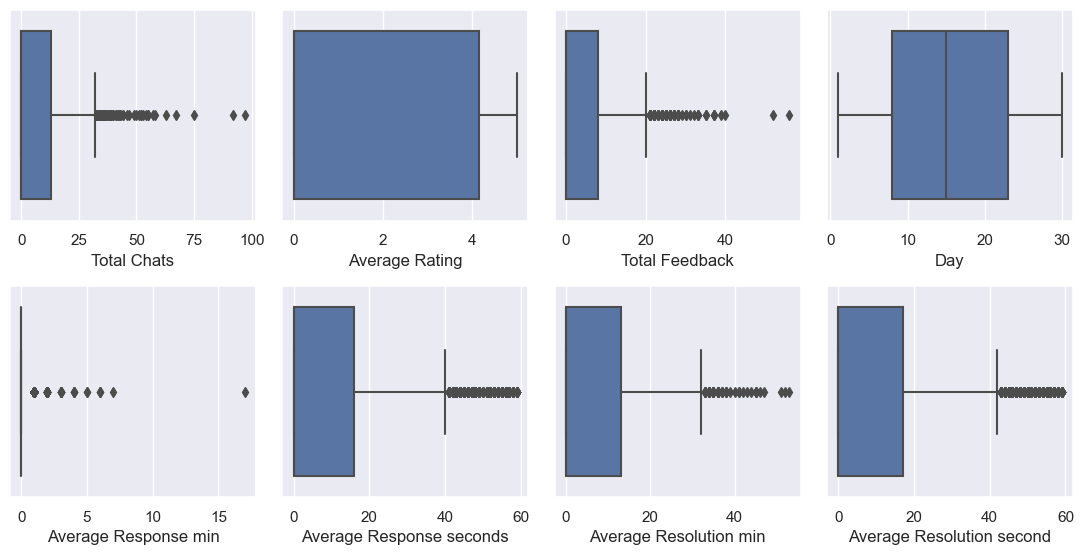

In [97]:
print(numeric_features)
try:
    for i in range(0,len(numeric_features)):
        plt.subplot(3,4,i+1)
        sns.boxplot(x=data[numeric_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

<AxesSubplot:>

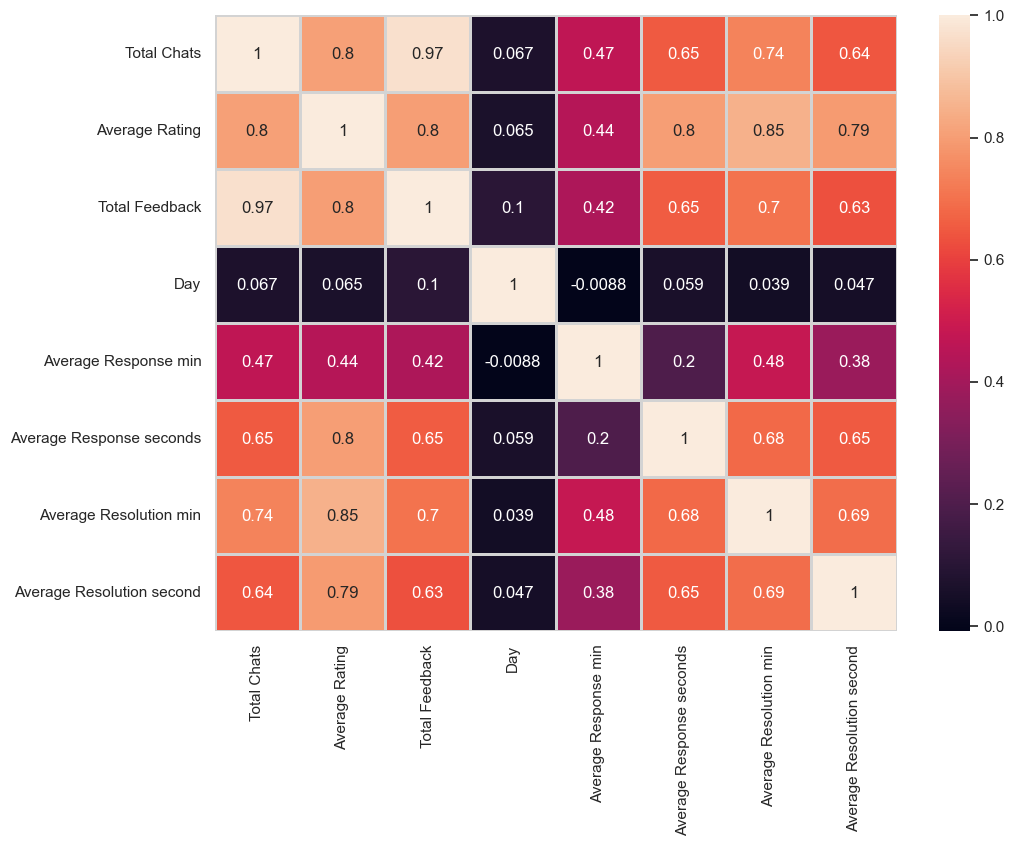

In [99]:
sns.heatmap(data.corr(),annot = True, linewidths = 2, linecolor = 'lightgrey')

In [116]:
top15ratings = data.groupby("Agent Name")["Average Rating"].mean().sort_values(ascending=False).reset_index().head(15)

In [117]:
top15ratings

,Agent Name,Average Rating
0,Shivananda Sonwane,4.232667
1,Khushboo Priya,3.703667
2,Manjunatha A,3.594667
3,Boktiar Ahmed Bappy,3.568000
4,Ishawant Kumar,3.543333
5,Madhulika G,3.498667
6,Ayushi Mishra,3.482000
7,Jawala Prakash,3.472000
8,Sanjeev Kumar,3.383000
9,Nishtha Jain,3.282333


<AxesSubplot:title={'center':'top 15 ratings'}, xlabel='Agent Name', ylabel='Average Rating'>

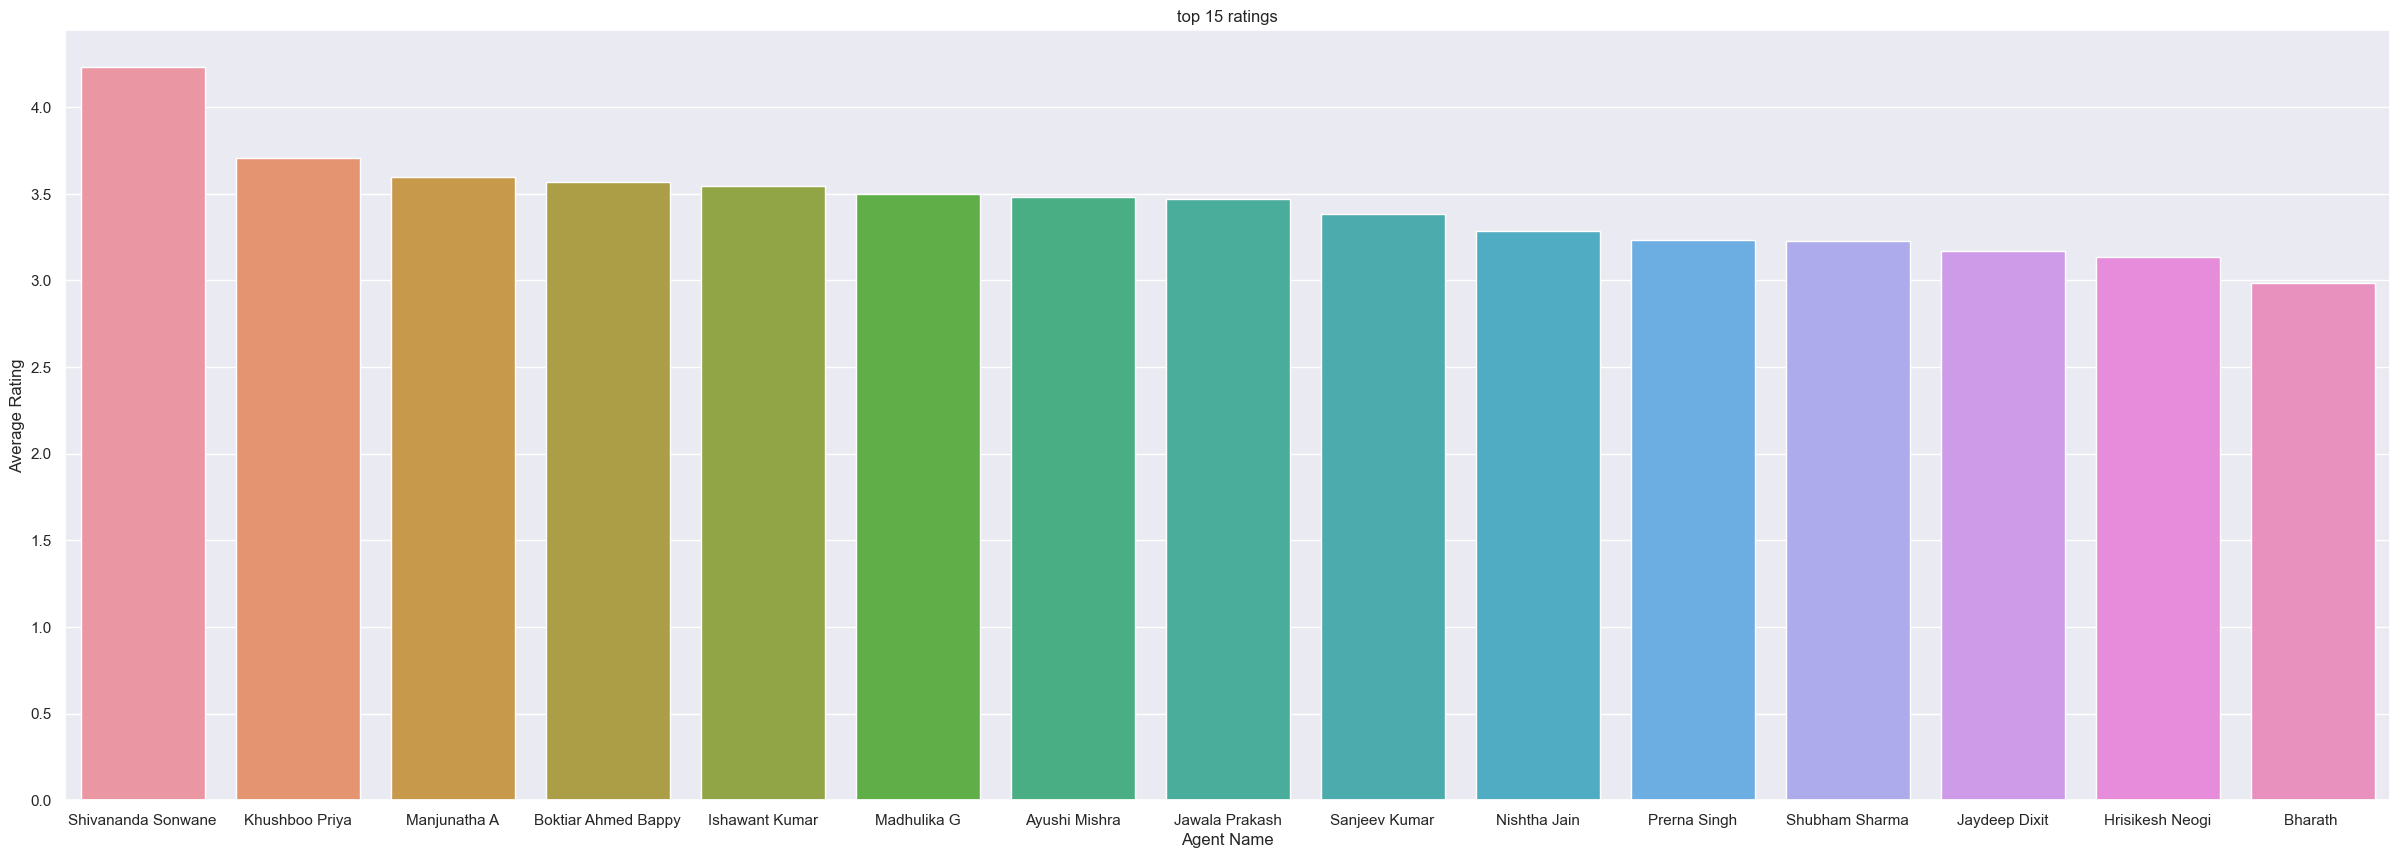

In [122]:
plt.figure(figsize=(30,10))
plt.title("top 15 ratings")
sns.barplot(x = "Agent Name",y="Average Rating",data=top10ratings)

In [129]:
top10_chats =  data.groupby("Agent Name")["Total Chats"].mean().sort_values(ascending=False).reset_index().head(10)

In [130]:
top10_chats

,Agent Name,Total Chats
0,Hrisikesh Neogi,19.266667
1,Nandani Gupta,18.666667
2,Zeeshan,18.066667
3,Maitry,18.066667
4,Swati,17.466667
5,Ayushi Mishra,17.133333
6,Jaydeep Dixit,17.066667
7,Shubham Sharma,17.000000
8,Sanjeev Kumar,16.900000
9,Mithun S,16.766667


<AxesSubplot:title={'center':'top 15 ratings'}, xlabel='Agent Name', ylabel='Total Chats'>

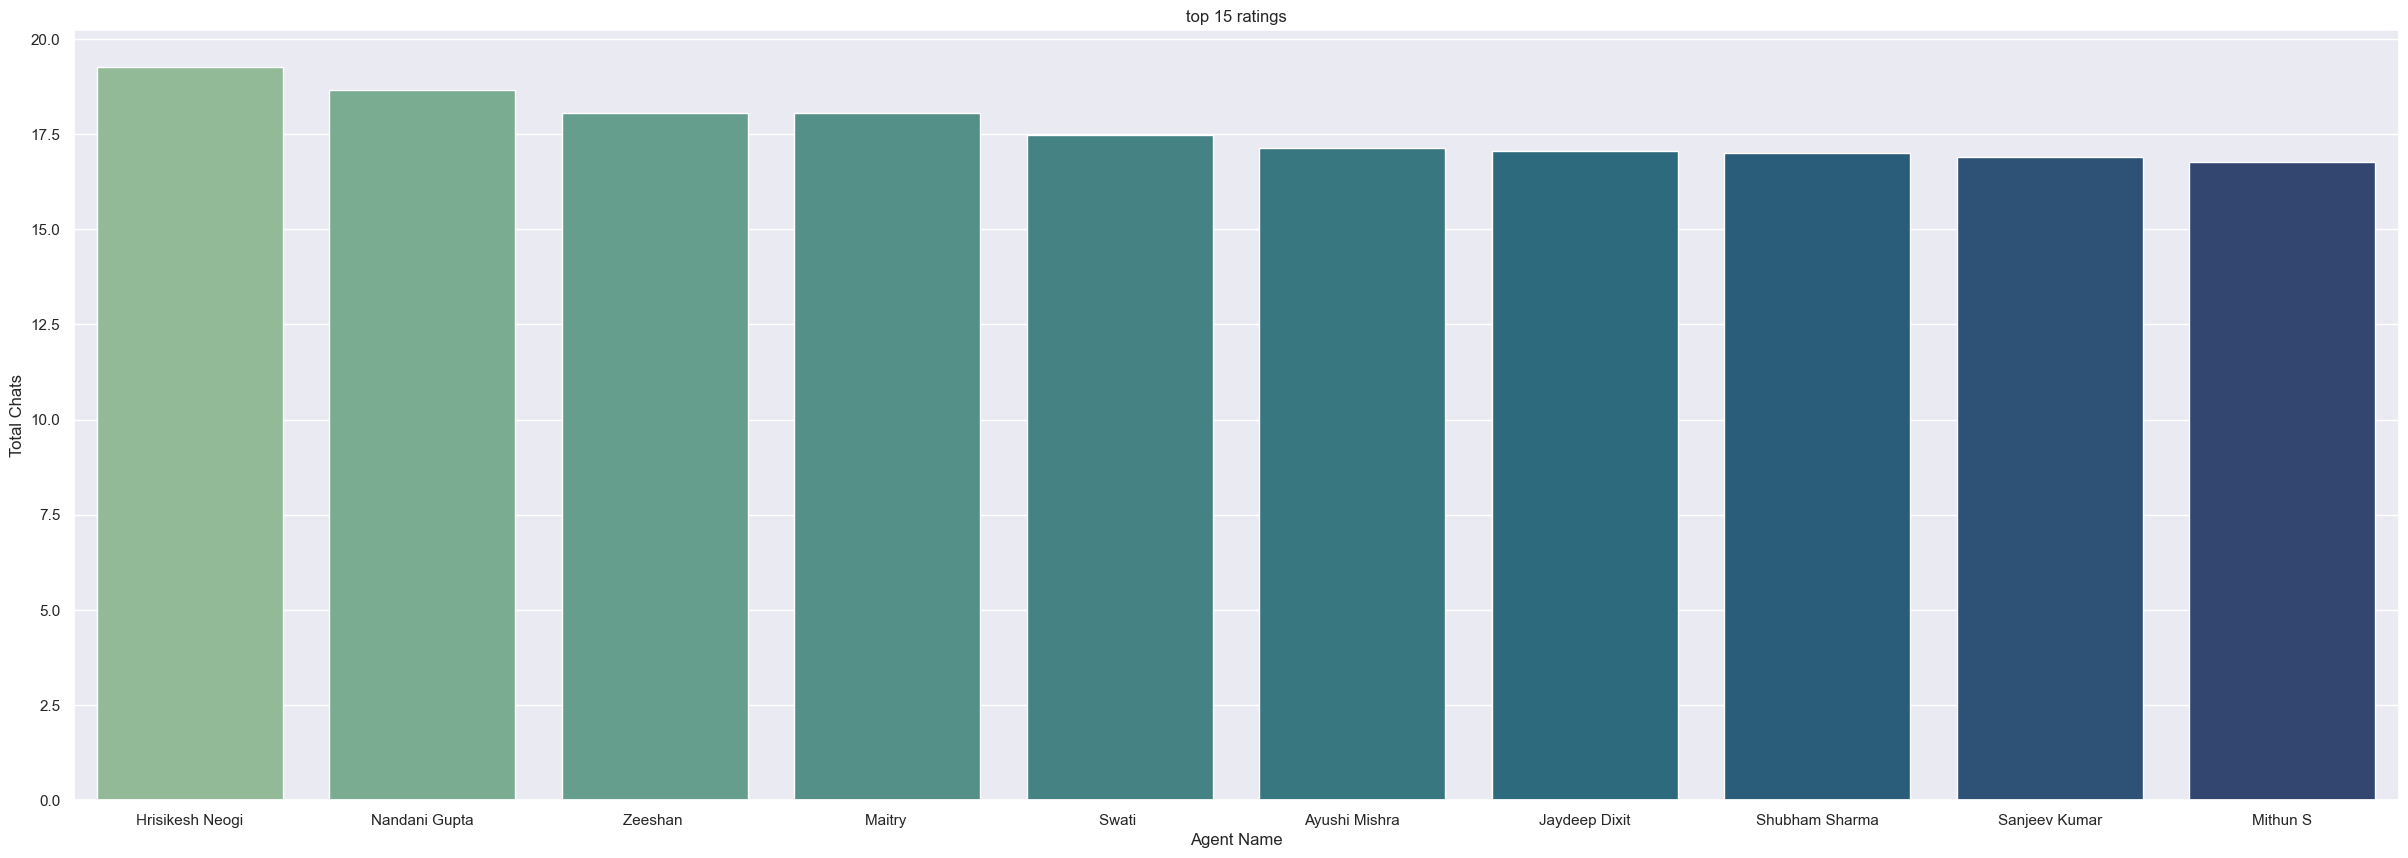

In [132]:
plt.figure(figsize=(30,10))
plt.title("top 15 ratings")
sns.barplot(x = "Agent Name",y="Total Chats",data=top10_chats,palette = 'crest')

<AxesSubplot:ylabel='Total Feedback'>

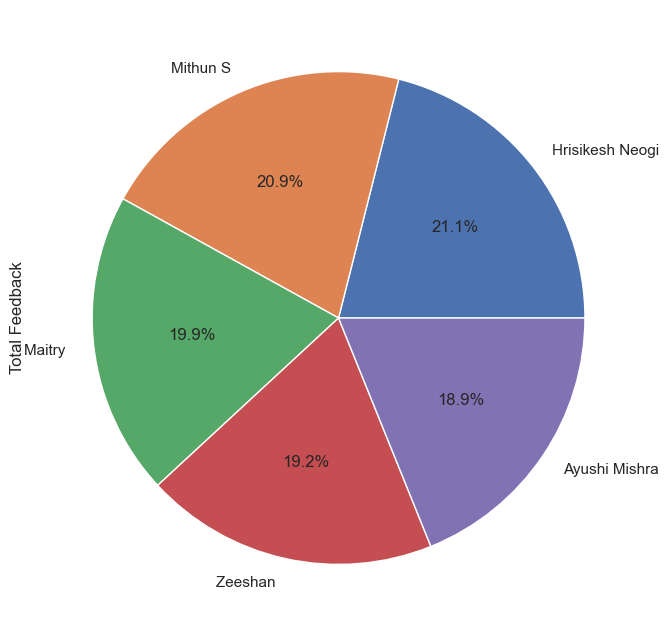

In [143]:
# feadbacktop5
data.groupby("Agent Name")["Total Feedback"].mean().sort_values(ascending=False).head(5).plot.pie(autopct="%1.1f%%")

In [160]:
top8_resolveproblem = data.groupby("Agent Name")["Average Resolution min"].mean().sort_values(ascending=False).reset_index().head(8)

In [161]:
top8_resolveproblem

,Agent Name,Average Resolution min
0,Shivananda Sonwane,20.633333
1,Deepranjan Gupta,18.500000
2,Nandani Gupta,17.866667
3,Jaydeep Dixit,17.600000
4,Shubham Sharma,17.100000
5,Sanjeev Kumar,16.866667
6,Manjunatha A,16.433333
7,Khushboo Priya,16.266667


<AxesSubplot:title={'center':'top8 problemsolver'}, xlabel='Agent Name', ylabel='Average Resolution min'>

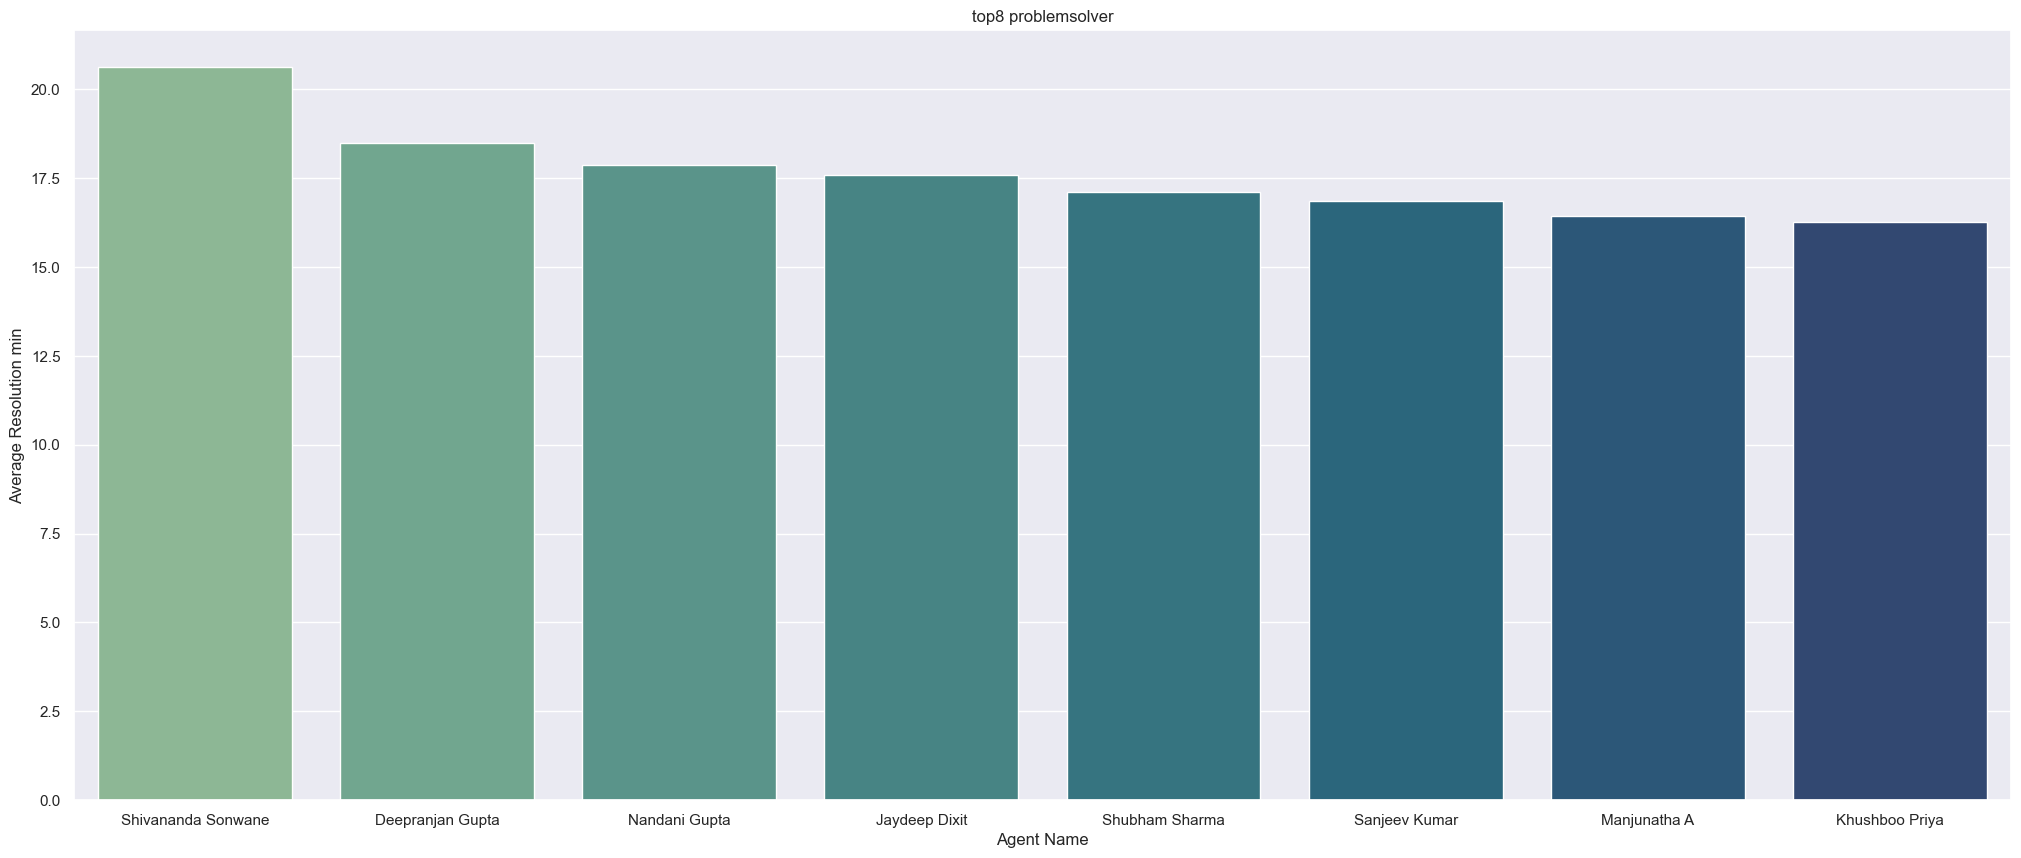

In [164]:
plt.figure(figsize=(25,10))
plt.title("top8 problemsolver")
sns.barplot(x = "Agent Name",y="Average Resolution min",data=top8_resolveproblem,palette = 'crest')

In [101]:
data

,Agent Name,Total Chats,Average Rating,Total Feedback,Day,Average Response min,Average Response seconds,Average Resolution min,Average Resolution second
0,Prerna Singh,11,4.11,9,30,0,38,4,20
1,Nandani Gupta,11,3.14,7,30,1,15,28,25
2,Ameya Jain,14,4.55,11,30,0,30,11,36
3,Mahesh Sarade,14,4.71,7,30,1,4,15,46
4,Swati,14,3.67,6,30,1,11,16,33
...,...,...,...,...,...,...,...,...,...
2155,Sowmiya Sivakumar,0,0.00,0,1,0,0,0,0
2156,Nitin M,0,0.00,0,1,0,0,0,0
2157,Vivek,0,0.00,0,1,0,0,0,0
2158,Ayushi Mishra,0,0.00,0,1,0,0,0,0
